In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sympy import Matrix
from scipy.spatial import distance
from sklearn.cluster import KMeans

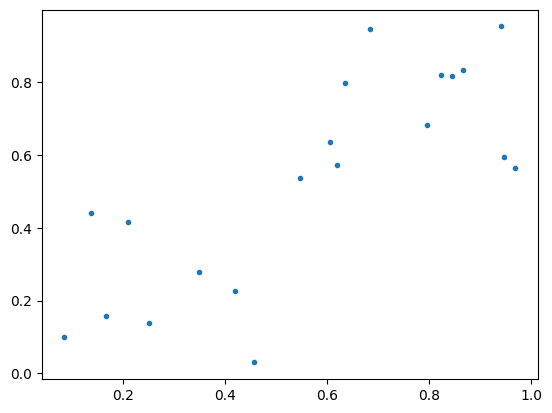

In [55]:
#True number of underlying clusters
d = 2 

#Assuming that each cluster is evenly spaced along the line y = x
partitions = list(np.linspace(0, 1, d + 1))

#True probability that the data is generated by each class
categorical_weights = random.uniform(0, 1, 2)
categorical_weights = categorical_weights/np.sum(categorical_weights)

x = []
y = []

N = 20 #Number of points, number of rows in matrices

#Generating sample points
for i in np.arange(N):
    #First determine which true cluster is generating the sample
    category_sample = random.uniform()
    temp = sorted(list(np.cumsum(categorical_weights)) + [category_sample])
    category_index = list(temp).index(category_sample)
    
    #Then generate the point
    x += [random.uniform(partitions[category_index], partitions[category_index + 1])]
    y += [random.uniform(partitions[category_index], partitions[category_index + 1])]     
    
plt.plot(x, y, '.')
samples = list(zip(x, y))

In [5]:
#mean = random.uniform(0, 10, 4)
#variances = random.uniform(0, 2.5, 4)
#covar = np.diag(variances)
#samples = [random.multivariate_normal(mean, covar) for i in np.arange(200)]

In [6]:
#categorical_weights = np.linspace(0.25, 1, 4)
#categorical_weights
#samples = []
#for i in np.arange(16):
#    categorical_weights = np.linspace(0.25, 1, 4)
#    category_sample = random.uniform()
#    temp = np.sort(np.append(categorical_weights, category_sample))
#    category_index = list(temp).index(category_sample)
#    samples.append(random.normal(mean[category_index], variances[category_index]))

In [56]:
#Construct similarity matrix
N = len(samples)
sigma = 1 #Controls width of neighborhoods, set by user
k = 2 #Number of clusters, set by user
S = np.zeros((N, N))
for i in np.arange(N):
    for j in np.arange(N):
        S[i, j] += np.exp(-distance.euclidean(samples[i], samples[j])/(2*sigma**2))

In [57]:
diags = []
for i in np.arange(N):
    sum =0
    for j in np.arange(N):
        sum += np.sum(S[i, j])
    diags += [sum]
D = np.diag(diags)

In [58]:
L = Matrix(D-S)

In [59]:
sorted_evals = sorted(L.eigenvals().keys())
k_evals = []
l = 0
while len(k_evals) < k:
    if sorted_evals[l] > 1e-10:
        k_evals.append(sorted_evals[l])
    l += 1

In [60]:
V = Matrix(np.zeros((N, k)))
i = 0
for eval in k_evals:
    for elem in L.eigenvects():
        if elem[0] == eval:
            V[:,i] = elem[2][0]
            break
    i += 1

In [61]:
kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(V)

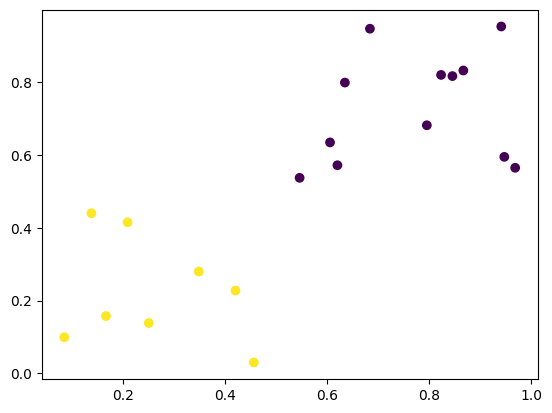

In [63]:
plt.scatter(x, y, c=kmeans.labels_)
plt.show()